In [1]:
ls 'drive/MyDrive/AIHealthcare/AU_Recognition_master/AU_Recognition-master/Model/alexnet-owt-4df8aa71.pth'

drive/MyDrive/AIHealthcare/AU_Recognition_master/AU_Recognition-master/Model/alexnet-owt-4df8aa71.pth


In [2]:
%cp -av "drive/MyDrive/AIHealthcare/AU_Recognition_master/AU_Recognition-master/Model" "/content/"
%cp -av "drive/MyDrive/AIHealthcare/AU_Recognition_master/AU_Recognition-master/main.py" "/content/"
%cp -av "drive/MyDrive/AIHealthcare/AU_Recognition_master/AU_Recognition-master/au_data_loader.py" "/content/"
%cp -av "drive/MyDrive/AIHealthcare/AU_Recognition_master/AU_Recognition-master/helper.py" "/content/"

'drive/MyDrive/AIHealthcare/AU_Recognition_master/AU_Recognition-master/Model' -> '/content/Model'
'drive/MyDrive/AIHealthcare/AU_Recognition_master/AU_Recognition-master/Model/alexnet-owt-4df8aa71.pth' -> '/content/Model/alexnet-owt-4df8aa71.pth'
'drive/MyDrive/AIHealthcare/AU_Recognition_master/AU_Recognition-master/Model/inception.py' -> '/content/Model/inception.py'
'drive/MyDrive/AIHealthcare/AU_Recognition_master/AU_Recognition-master/Model/__init__.py' -> '/content/Model/__init__.py'
'drive/MyDrive/AIHealthcare/AU_Recognition_master/AU_Recognition-master/Model/resnet.py' -> '/content/Model/resnet.py'
'drive/MyDrive/AIHealthcare/AU_Recognition_master/AU_Recognition-master/Model/vgg.py' -> '/content/Model/vgg.py'
'drive/MyDrive/AIHealthcare/AU_Recognition_master/AU_Recognition-master/Model/alexnet.py' -> '/content/Model/alexnet.py'
'drive/MyDrive/AIHealthcare/AU_Recognition_master/AU_Recognition-master/main.py' -> '/content/main.py'
'drive/MyDrive/AIHealthcare/AU_Recognition_maste

In [3]:
import os
import torch
from torch.utils.data import Dataset
from PIL import Image, ImageDraw
import numpy as np

import shutil
import torch
import numpy as np

import argparse
import itertools

import torch.nn as nn
import torch.optim as optim
from torch.autograd import Variable
from torch.utils.data import DataLoader
from torchvision import transforms
from sklearn.model_selection import KFold
from sklearn.metrics import f1_score, confusion_matrix
import matplotlib.pyplot as plt

# from au_data_loader import *
# from helper import *
from Model import *

In [4]:
import os
import torch.nn as nn
import torch.utils.model_zoo as model_zoo
import torch

__all__ = ['AlexNet', 'alexnet']

# You need to download the model
model_urls = {
    'alexnet': 'drive/MyDrive/AIHealthcare/AU_Recognition_master/AU_Recognition-master/Model/alexnet-owt-4df8aa71.pth',
}

model_name = r'alexnet-owt-4df8aa71.pth'

class AlexNet(nn.Module):
    def __init__(self, num_classes=256 * 6 * 6):
        super(AlexNet, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=11, stride=4, padding=2),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2),
            nn.Conv2d(64, 192, kernel_size=5, padding=2),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2),
            nn.Conv2d(192, 384, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(384, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(256, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2),
        )

        num1 = 1024
        num2 = 128
        self.classifier1 = nn.Sequential(
            nn.Linear(num_classes, num1),
            nn.Dropout(),
            nn.ReLU(inplace=True),
            nn.Linear(num1, num2),
            nn.Dropout(),
            nn.ReLU(inplace=True),
            nn.Linear(num2, 1),
            nn.Sigmoid()
        )
        self.classifier2 = nn.Sequential(
            nn.Linear(num_classes, num1),
            nn.Dropout(),
            nn.ReLU(inplace=True),
            nn.Linear(num1, num2),
            nn.Dropout(),
            nn.ReLU(inplace=True),
            nn.Linear(num2, 1),
            nn.Sigmoid()
        )
        self.classifier3 = nn.Sequential(
            nn.Linear(num_classes, num1),
            nn.Dropout(),
            nn.ReLU(inplace=True),
            nn.Linear(num1, num2),
            nn.Dropout(),
            nn.ReLU(inplace=True),
            nn.Linear(num2, 1),
            nn.Sigmoid()
        )
        self.classifier4 = nn.Sequential(
            nn.Linear(num_classes, num1),
            nn.Dropout(),
            nn.ReLU(inplace=True),
            nn.Linear(num1, num2),
            nn.Dropout(),
            nn.ReLU(inplace=True),
            nn.Linear(num2, 1),
            nn.Sigmoid()
        )
        self.classifier5 = nn.Sequential(
            nn.Linear(num_classes, num1),
            nn.Dropout(),
            nn.ReLU(inplace=True),
            nn.Linear(num1, num2),
            nn.Dropout(),
            nn.ReLU(inplace=True),
            nn.Linear(num2, 1),
            nn.Sigmoid()
        )
        self.classifier6 = nn.Sequential(
            nn.Linear(num_classes, num1),
            nn.Dropout(),
            nn.ReLU(inplace=True),
            nn.Linear(num1, num2),
            nn.Dropout(),
            nn.ReLU(inplace=True),
            nn.Linear(num2, 1),
            nn.Sigmoid()
        )
        self.classifier7 = nn.Sequential(
            nn.Linear(num_classes, num1),
            nn.Dropout(),
            nn.ReLU(inplace=True),
            nn.Linear(num1, num2),
            nn.Dropout(),
            nn.ReLU(inplace=True),
            nn.Linear(num2, 1),
            nn.Sigmoid()
        )
        self.classifier8 = nn.Sequential(
            nn.Linear(num_classes, num1),
            nn.Dropout(),
            nn.ReLU(inplace=True),
            nn.Linear(num1, num2),
            nn.Dropout(),
            nn.ReLU(inplace=True),
            nn.Linear(num2, 1),
            nn.Sigmoid()
        )
        self.classifier9 = nn.Sequential(
            nn.Linear(num_classes, num1),
            nn.Dropout(),
            nn.ReLU(inplace=True),
            nn.Linear(num1, num2),
            nn.Dropout(),
            nn.ReLU(inplace=True),
            nn.Linear(num2, 1),
            nn.Sigmoid()
        )
        self.classifier10 = nn.Sequential(
            nn.Linear(num_classes, num1),
            nn.Dropout(),
            nn.ReLU(inplace=True),
            nn.Linear(num1, num2),
            nn.Dropout(),
            nn.ReLU(inplace=True),
            nn.Linear(num2, 1),
            nn.Sigmoid()
        )
        self.classifier11 = nn.Sequential(
            nn.Linear(num_classes, num1),
            nn.Dropout(),
            nn.ReLU(inplace=True),
            nn.Linear(num1, num2),
            nn.Dropout(),
            nn.ReLU(inplace=True),
            nn.Linear(num2, 1),
            nn.Sigmoid()
        )
        self.classifier12 = nn.Sequential(
            nn.Linear(num_classes, num1),
            nn.Dropout(),
            nn.ReLU(inplace=True),
            nn.Linear(num1, num2),
            nn.Dropout(),
            nn.ReLU(inplace=True),
            nn.Linear(num2, 1),
            nn.Sigmoid()
        )
        self.classifier13 = nn.Sequential(
            nn.Linear(num_classes, num1),
            nn.Dropout(),
            nn.ReLU(inplace=True),
            nn.Linear(num1, num2),
            nn.Dropout(),
            nn.ReLU(inplace=True),
            nn.Linear(num2, 1),
            nn.Sigmoid()
        )
        self.classifier14 = nn.Sequential(
            nn.Linear(num_classes, num1),
            nn.Dropout(),
            nn.ReLU(inplace=True),
            nn.Linear(num1, num2),
            nn.Dropout(),
            nn.ReLU(inplace=True),
            nn.Linear(num2, 1),
            nn.Sigmoid()
        )
        self.classifier15 = nn.Sequential(
            nn.Linear(num_classes, num1),
            nn.Dropout(),
            nn.ReLU(inplace=True),
            nn.Linear(num1, num2),
            nn.Dropout(),
            nn.ReLU(inplace=True),
            nn.Linear(num2, 1),
            nn.Sigmoid()
        )
        self.classifier16 = nn.Sequential(
            nn.Linear(num_classes, num1),
            nn.Dropout(),
            nn.ReLU(inplace=True),
            nn.Linear(num1, num2),
            nn.Dropout(),
            nn.ReLU(inplace=True),
            nn.Linear(num2, 1),
            nn.Sigmoid()
        )
        self.classifier17 = nn.Sequential(
            nn.Linear(num_classes, num1),
            nn.Dropout(),
            nn.ReLU(inplace=True),
            nn.Linear(num1, num2),
            nn.Dropout(),
            nn.ReLU(inplace=True),
            nn.Linear(num2, 1),
            nn.Sigmoid()
        )
        # </editor-fold>

    def forward(self, x):
        x = self.features(x)
        x = x.view(x.size(0), 256 * 6 * 6)
        # x = self.classifier(x)
        x1 = self.classifier1(x)
        x2 = self.classifier2(x)
        x3 = self.classifier3(x)
        x4 = self.classifier4(x)
        x5 = self.classifier5(x)
        x6 = self.classifier6(x)
        x7 = self.classifier7(x)
        x8 = self.classifier8(x)
        x9 = self.classifier9(x)
        x10 = self.classifier10(x)
        x11 = self.classifier11(x)
        x12 = self.classifier12(x)
        x13 = self.classifier13(x)
        x14 = self.classifier14(x)
        x15 = self.classifier15(x)
        x16 = self.classifier16(x)
        x17 = self.classifier17(x)
        return torch.cat((x1, x2, x3, x4, x5, x6, x7, x8, x9, x10, x11, x12, x13, x14, x15, x16, x17), 1)


def alexnet(pretrained=False, **kwargs):
    model = AlexNet(**kwargs)
    if pretrained:
        model_dir = 'drive/MyDrive/AIHealthcare/AU_Recognition_master/AU_Recognition-master/Model/'
        model_path = os.path.join(model_dir, model_name)
        model_param = torch.load(model_path)
        for name, value in model_param.items():
            if name.startswith('features') and name in model.state_dict():
                model.state_dict()[name].copy_(value.data)
    return model

## au_data_loader

In [5]:
def get_reserved_set(label_path_dir):
    au_label = []
    returned_label = []
    for names in os.listdir(label_path_dir):
        name = os.path.join(label_path_dir, names)
        for sequences in os.listdir(name):
            sequence = os.path.join(name, sequences)
            if os.listdir(sequence):
                temp = np.loadtxt(os.path.join(sequence, os.listdir(sequence)[-1]))
                if temp.ndim == 1:
                    au_label.append(temp.astype(np.int32))
                    returned_label.append(temp[0].astype(np.int32))
                elif temp.ndim == 2:
                    au_label.extend(temp.astype(np.int32))
                    returned_label.append(temp[:, 0].astype(np.int32))
                else:
                    print(temp)
                    raise Exception("label info error!")
    ll = []
    for au in au_label:
        if au.ndim == 2:
            ll.extend(au[:, 0].astype(np.int32))
        elif au.ndim == 1:
            ll.append(au[0].astype(np.int32))
        else:
            print(au)
            raise Exception("label info error!")
    label_set = set(ll)
    reserved_set = set()
    for label in label_set:
        if ll.count(label) > 35:
            reserved_set.add(label)
    return reserved_set, returned_label  # (1, 2, 4, 5, 6, 7, 9, 12, 14, 15, 17, 20, 23, 24, 25, 27)


def convert_label(init_label, reserved_set):
    reserved_list = list(reserved_set)
    converted_label = [0] * len(reserved_set)
    if type(init_label) == list:
        for l in init_label:
            for i in range(len(reserved_list)):
                if l == reserved_list[i]:
                    converted_label[i] = 1
    elif type(init_label) == int:
        for i in range(len(reserved_list)):
            if init_label == reserved_list[i]:
                converted_label[i] = 1
    else:
        print("init label is not a list! '", init_label, "'")
        print("type is", type(init_label))
        raise Exception

    return converted_label


def draw_landmark_point(img, landmark):
    draw = ImageDraw.Draw(img)
    t = 1
    for point in landmark:
        draw.text(point.tolist(), str(t), fill=255)
        t += 1
    img.show()


def crop_au_img(img, landmark):
    width, height = img.size
    left = max(int(min(landmark[:, 0])) - 10, 0)
    right = min(width, int(max(landmark[:, 0] + 10)))
    top = max(int(min(landmark[:, 1])) - 20, 0)
    bottom = min(height, int(max(landmark[:, 1])) + 10)
    img = img.crop((left, top, right, bottom))
    return img


def load_au_image_from_path(data_path_dir):
    # prepare au image
    au_image = []
    for names in os.listdir(data_path_dir):
        name = os.path.join(data_path_dir, names)
        for sequences in os.listdir(name):
            sequence = os.path.join(name, sequences)
            if os.path.isdir(sequence):
                if os.listdir(sequence):
                    au_image.append(
                        Image.open(os.path.join(sequence, os.listdir(sequence)[-1])).convert('RGB'))
    return au_image


def load_au_label_from_path(label_path_dir, reserved_label, reserved_set):
    # prepare au label
    au_label = []
    for l in reserved_label:
        au_label.append(convert_label(l.tolist(), reserved_set))
    return au_label


def load_au_landmark_from_path(landmark_path_dir):
    au_landmark = []
    for names in os.listdir(landmark_path_dir):
        name = os.path.join(landmark_path_dir, names)
        for sequences in os.listdir(name):
            sequence = os.path.join(name, sequences)
            if os.listdir(sequence):
                au_landmark.append(np.loadtxt(os.path.join(sequence, os.listdir(sequence)[-1])))
    return au_landmark


def load_au_emotion_from_path(emotion_path_dir):
    au_emotion_landmark_path = []
    for names in os.listdir(emotion_path_dir):
        name = os.path.join(emotion_path_dir, names)
        for sequences in os.listdir(name):
            sequence = os.path.join(name, sequences)
            if os.listdir(sequence):
                au_emotion_landmark_path.append(os.path.join(sequence, os.listdir(sequence)[-1]))
    return au_emotion_landmark_path


class au_data_loader(Dataset):
    def __init__(self, au_image, au_label, transform=None, target_transform=None):
        # prepare au image
        self.au_image = au_image

        # prepare au label
        self.au_label = au_label
        self.au_label = torch.from_numpy(np.array(self.au_label)).float()

        # prepare au landmark
        # self.au_landmark = au_landmark
        # prepare au emotions
        # self.au_emotion_landmark_path = au_emotion_landmark_path

        self.transform = transform
        self.target_transform = target_transform

        self.train_data = self.au_image
        self.train_label = self.au_label

    def __getitem__(self, index):
        img = self.train_data[index]
        img = Image.fromarray(img)
        target = self.train_label[index]

        if self.transform is not None:
            img = self.transform(img)

        if self.target_transform is not None:
            target = self.target_transform(target)

        return img, target

    def __len__(self):
        return len(self.train_data)

# helper

In [6]:
class AverageMeter(object):
    """Computes and stores the average and current value"""

    def __init__(self):
        self.reset()

    def reset(self):
        self.val = 0
        self.avg = 0
        self.sum = 0
        self.count = 0

    def update(self, val, n=1):
        self.val = val
        self.sum += val * n
        self.count += n
        self.avg = self.sum / self.count


class AverageMeterList(object):
    def __init__(self, length):
        self.val = [0] * length
        self.avg = [0] * length
        self.sum = [0] * length
        self.count = 0

    def update(self, val, n=1):
        self.val = val
        self.sum = (np.array(val) * n + np.array(self.sum)).tolist()
        self.count += n
        self.avg = (np.array(self.sum) / self.count).tolist()


def accuracy(output, target):
    pred = (output >= 0.5).float()
    acc = pred.eq(target).sum(dim=0).float().div(output.size(0)).mul_(100)
    return acc.tolist()


def f1score_helper(output, target, eps=1e-5):
    pred = (output >= 0.5).astype(np.float32)
    tp = np.sum(pred * target, axis=0)
    p = np.sum(pred, axis=0)
    precision = tp / (p + eps)
    t = np.sum(target, axis=0)
    recall = tp / (t + eps)
    f1 = 2 * recall * precision / (precision + recall)
    return f1


def adjust_learning_rate(optimizer, epoch, init_lr, steps=50):
    """Sets the learning rate to the initial LR decayed by 0.5 every steps epochs"""
    lr = init_lr * (0.5 ** (epoch // steps))
    for param_group in optimizer.param_groups:
        param_group['lr'] = lr


def save_checkpoint(state, is_best, filename='au_model'):
    torch.save(state, filename+'.pth')
    if is_best:
        shutil.copyfile(filename+'.pth', filename+'_best.pth')


# main

In [7]:
best_prec = np.inf

In [8]:
def train(train_loader, model, criterion, optimizer, epoch, print_freq=5):
    losses = AverageMeter()
    model.train()

    for i, (input, target) in enumerate(train_loader):
        target = target.cuda(non_blocking =True)
        input = input.cuda(non_blocking =True)
        input_var = Variable(input)
        target_var = Variable(target)
        optimizer.zero_grad()

        # compute output
        output = model(input_var)
        loss0 = criterion(output[:, 0], target_var[:, 0])
        loss1 = criterion(output[:, 1], target_var[:, 1])
        loss2 = criterion(output[:, 2], target_var[:, 2])
        loss3 = criterion(output[:, 3], target_var[:, 3])
        loss4 = criterion(output[:, 4], target_var[:, 4])
        loss5 = criterion(output[:, 5], target_var[:, 5])
        loss6 = criterion(output[:, 6], target_var[:, 6])
        loss7 = criterion(output[:, 7], target_var[:, 7])
        loss8 = criterion(output[:, 8], target_var[:, 8])
        loss9 = criterion(output[:, 9], target_var[:, 9])
        loss10 = criterion(output[:, 10], target_var[:, 10])
        loss11 = criterion(output[:, 11], target_var[:, 11])
        loss12 = criterion(output[:, 12], target_var[:, 12])
        loss13 = criterion(output[:, 13], target_var[:, 13])
        loss14 = criterion(output[:, 14], target_var[:, 14])
        loss15 = criterion(output[:, 15], target_var[:, 15])
        loss16 = criterion(output[:, 16], target_var[:, 16])
        loss = loss0 + loss1 + loss2 + loss3 + loss4 + loss5 + loss6 + loss7 + loss8 + loss9 + loss10 + loss11 + loss12 + loss13 + loss14 + loss15 + loss16
        losses.update(loss.item(), input.size(0))
        loss.backward()
        optimizer.step()
        if (i + 1) % print_freq == 0:
            print('Epoch: [{0}][{1}/{2}]\t''Loss {loss.val:.4f} ({loss.avg:.4f})'.format(epoch, i + 1, len(train_loader), loss=losses))

In [9]:
def valid(val_loader, model, criterion, print_freq=1):
    losses = AverageMeter()
    model.eval()
    return_pred, return_tar = [], []

    for i, (input, target) in enumerate(val_loader):
        input = input.cuda(non_blocking =True)
        # with torch.no_grad():
        input_var = Variable(input, volatile=True)
        target_var = Variable(target.cuda(non_blocking =True), volatile=True)
        # compute output
        output = model(input_var)
        loss0 = criterion(output[:, 0], target_var[:, 0])
        loss1 = criterion(output[:, 1], target_var[:, 1])
        loss2 = criterion(output[:, 2], target_var[:, 2])
        loss3 = criterion(output[:, 3], target_var[:, 3])
        loss4 = criterion(output[:, 4], target_var[:, 4])
        loss5 = criterion(output[:, 5], target_var[:, 5])
        loss6 = criterion(output[:, 6], target_var[:, 6])
        loss7 = criterion(output[:, 7], target_var[:, 7])
        loss8 = criterion(output[:, 8], target_var[:, 8])
        loss9 = criterion(output[:, 9], target_var[:, 9])
        loss10 = criterion(output[:, 10], target_var[:, 10])
        loss11 = criterion(output[:, 11], target_var[:, 11])
        loss12 = criterion(output[:, 12], target_var[:, 12])
        loss13 = criterion(output[:, 13], target_var[:, 13])
        loss14 = criterion(output[:, 14], target_var[:, 14])
        loss15 = criterion(output[:, 15], target_var[:, 15])
        loss16 = criterion(output[:, 16], target_var[:, 16])
        loss = loss0 + loss1 + loss2 + loss3 + loss4 + loss5 + loss6 + loss7 + loss8 + loss9 + loss10 + loss11 + loss12 + loss13 + loss14 + loss15 + loss16
        return_pred.extend(output.data.cpu().tolist())
        return_tar.extend(target.tolist())
        losses.update(loss.item(), input.size(0))
        if (i + 1) % print_freq == 0:
            print('Validate: [{0}/{1}]\t''Loss {loss.val:.4f} ({loss.avg:.4f})'.format(i + 1, len(val_loader), loss=losses))
    return return_tar, return_pred, np.mean(losses.avg)

In [17]:
ls 'drive/MyDrive/AIHealthcare/CK_dataset/CKPlus/Landmarks'

S005/  S042/  S058/  S070/  S082/  S094/  S106/  S118/  S131/  S151/  S506/
S010/  S044/  S059/  S071/  S083/  S095/  S107/  S119/  S132/  S154/  S895/
S011/  S045/  S060/  S072/  S084/  S096/  S108/  S120/  S133/  S155/  S999/
S014/  S046/  S061/  S073/  S085/  S097/  S109/  S121/  S134/  S156/
S022/  S050/  S062/  S074/  S086/  S098/  S110/  S122/  S135/  S157/
S026/  S051/  S063/  S075/  S087/  S099/  S111/  S124/  S136/  S158/
S028/  S052/  S064/  S076/  S088/  S100/  S112/  S125/  S137/  S160/
S029/  S053/  S065/  S077/  S089/  S101/  S113/  S126/  S138/  S501/
S032/  S054/  S066/  S078/  S090/  S102/  S114/  S127/  S139/  S502/
S034/  S055/  S067/  S079/  S091/  S103/  S115/  S128/  S147/  S503/
S035/  S056/  S068/  S080/  S092/  S104/  S116/  S129/  S148/  S504/
S037/  S057/  S069/  S081/  S093/  S105/  S117/  S130/  S149/  S505/


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:29: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


Epoch: [0][5/34]	Loss 9.1851 (9.6937)
Epoch: [0][10/34]	Loss 9.3893 (9.6887)
Epoch: [0][15/34]	Loss 9.6425 (9.6229)
Epoch: [0][20/34]	Loss 9.8226 (9.5866)
Epoch: [0][25/34]	Loss 9.9035 (9.4788)
Epoch: [0][30/34]	Loss 8.7994 (9.3973)
Epoch: [1][5/34]	Loss 9.7900 (9.5282)
Epoch: [1][10/34]	Loss 8.7454 (9.0320)
Epoch: [1][15/34]	Loss 9.3366 (9.0365)
Epoch: [1][20/34]	Loss 9.3861 (9.0803)
Epoch: [1][25/34]	Loss 7.9227 (9.0015)
Epoch: [1][30/34]	Loss 7.9741 (8.9734)
Epoch: [2][5/34]	Loss 9.6602 (9.0253)
Epoch: [2][10/34]	Loss 9.1128 (9.0125)
Epoch: [2][15/34]	Loss 8.6256 (8.8970)
Epoch: [2][20/34]	Loss 8.9153 (8.8269)
Epoch: [2][25/34]	Loss 8.0220 (8.7266)
Epoch: [2][30/34]	Loss 8.2524 (8.7450)
Epoch: [3][5/34]	Loss 8.4045 (8.7386)
Epoch: [3][10/34]	Loss 9.0490 (8.8819)
Epoch: [3][15/34]	Loss 7.4334 (8.6387)
Epoch: [3][20/34]	Loss 8.6614 (8.6085)
Epoch: [3][25/34]	Loss 9.2706 (8.5831)
Epoch: [3][30/34]	Loss 8.7836 (8.6557)
Epoch: [4][5/34]	Loss 9.5862 (8.8076)
Epoch: [4][10/34]	Loss 7.8823 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  # Remove the CWD from sys.path while we load stuff.


Streaming output truncated to the last 5000 lines.
Epoch: [91][10/34]	Loss 0.8529 (1.1767)
Epoch: [91][15/34]	Loss 2.0137 (1.3365)
Epoch: [91][20/34]	Loss 1.4901 (1.3263)
Epoch: [91][25/34]	Loss 0.9421 (1.3177)
Epoch: [91][30/34]	Loss 1.6540 (1.3051)
Epoch: [92][5/34]	Loss 1.5245 (1.4379)
Epoch: [92][10/34]	Loss 0.8397 (1.3372)
Epoch: [92][15/34]	Loss 1.8091 (1.3142)
Epoch: [92][20/34]	Loss 1.0620 (1.2963)
Epoch: [92][25/34]	Loss 0.8128 (1.2896)
Epoch: [92][30/34]	Loss 1.1082 (1.2661)
Epoch: [93][5/34]	Loss 1.9249 (1.1585)
Epoch: [93][10/34]	Loss 1.1992 (1.2224)
Epoch: [93][15/34]	Loss 1.0963 (1.2393)
Epoch: [93][20/34]	Loss 1.1214 (1.2635)
Epoch: [93][25/34]	Loss 1.2680 (1.2800)
Epoch: [93][30/34]	Loss 1.4495 (1.2585)
Epoch: [94][5/34]	Loss 1.3033 (1.0591)
Epoch: [94][10/34]	Loss 0.9080 (1.1546)
Epoch: [94][15/34]	Loss 1.1535 (1.1244)
Epoch: [94][20/34]	Loss 0.9109 (1.0931)
Epoch: [94][25/34]	Loss 1.5517 (1.1558)
Epoch: [94][30/34]	Loss 0.9458 (1.1492)
Epoch: [95][5/34]	Loss 1.5657 (1

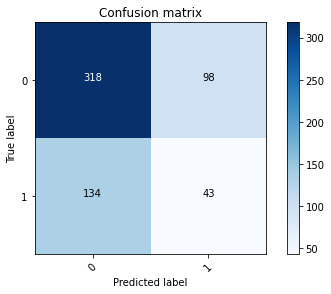

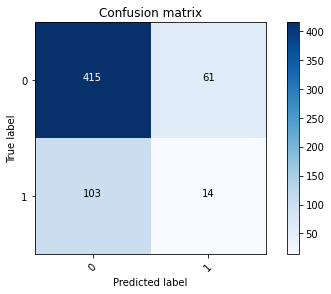

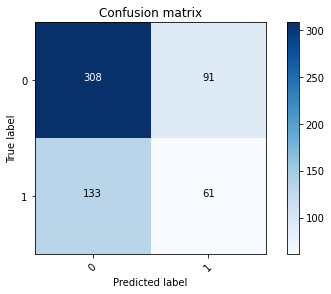

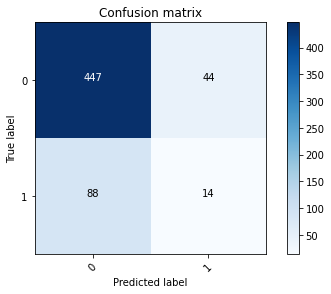

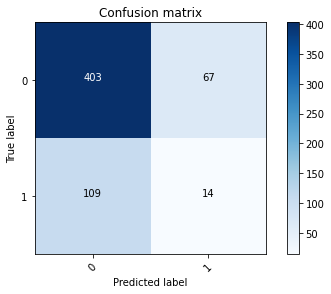

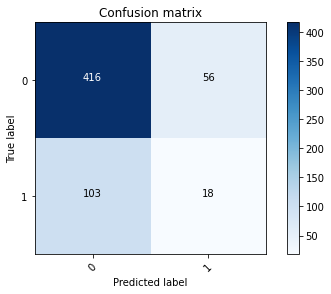

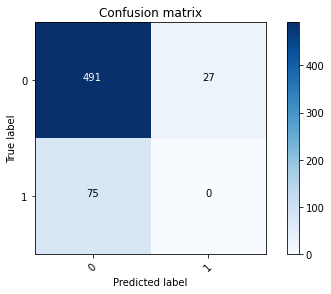

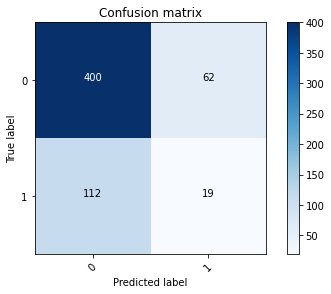

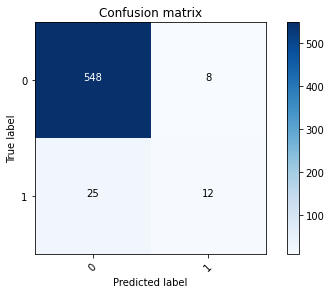

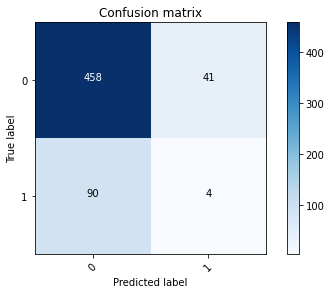

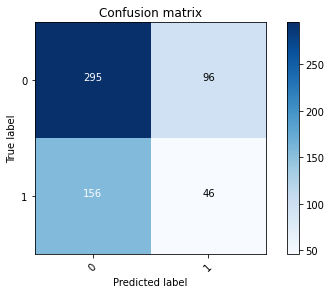

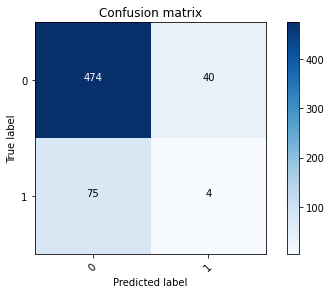

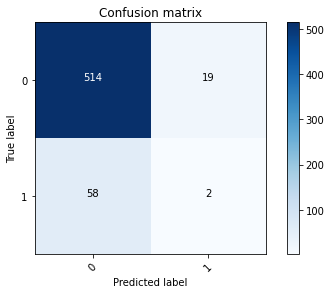

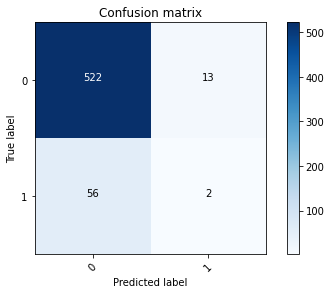

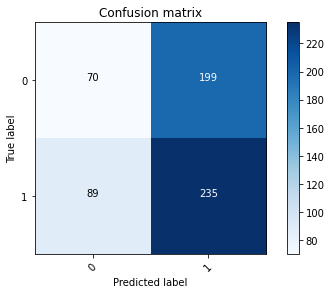

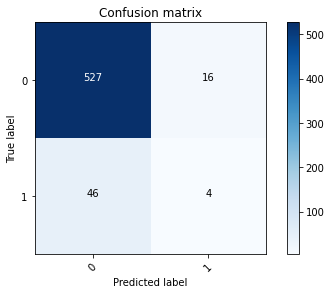

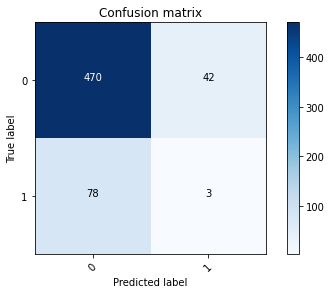

In [18]:
def main():
    global best_prec
    data_path_dir = 'drive/MyDrive/AIHealthcare/Cohn_Kanade_Database/CK+/cohn-kanade-images'
    label_path_dir = 'drive/MyDrive/AIHealthcare/Cohn_Kanade_Database/CK+/FACS'
    landmark_path_dir = 'drive/MyDrive/AIHealthcare/CK_dataset/CKPlus/Landmarks'
       

    if 'alexnet' == 'inception':
        transform = transforms.Compose([
            transforms.Resize((299, 299)),
            transforms.ToTensor(),
            transforms.Normalize(mean=[0.5, 0.5, 0.5],
                                 std=[0.5, 0.5, 0.5])
        ])
    else:
        transform = transforms.Compose([
            transforms.Resize((224, 224)),
            transforms.ToTensor(),
            transforms.Normalize(mean=[0.5, 0.5, 0.5],
                                 std=[0.5, 0.5, 0.5])
        ])

    reserved_set, reserved_label = get_reserved_set(label_path_dir)
    au_image = load_au_image_from_path(data_path_dir)
    au_label = load_au_label_from_path(label_path_dir, reserved_label, reserved_set)
    au_landmark = load_au_landmark_from_path(landmark_path_dir)
    for i in range(len(au_image)):
        au_image[i] = np.array(crop_au_img(au_image[i], au_landmark[i]))
    au_image = np.array(au_image)
    au_label = np.array(au_label)

    # build model
    model, criterion, optimizer = build_model()

    if '':
        if os.path.isfile(''):
            print("=> loading checkpoint '{}'".format(''))
            checkpoint = torch.load('')
            # 0 = checkpoint['epoch']
            best_prec = checkpoint['best_prec']
            model.load_state_dict(checkpoint['state_dict'])
            optimizer.load_state_dict(checkpoint['optimizer'])
            print("=> loaded checkpoint '{}' ".format(''))
        else:
            print("=> no checkpoint found at '{}'".format(''))

    fold = 10
    kf = KFold(fold, shuffle=True, random_state=20)
    res_tar, res_pred = [], []
    for k, (train_index, test_index) in enumerate(kf.split(au_image, au_label)):
        train_dataset = au_data_loader(au_image[train_index], au_label[train_index], transform=transform)
        valid_dataset = au_data_loader(au_image[test_index], au_label[test_index], transform=transform)
        train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True, pin_memory=True)
        valid_loader = DataLoader(valid_dataset, batch_size=16, shuffle=False, pin_memory=True)

        if False:
            tar, pred, _ = valid(valid_loader, model, criterion)
            res_pred.extend(pred)
            res_tar.extend(tar)
            continue

        # build a new model
        model, criterion, optimizer = build_model()

        for epoch in range(0, 100):
            adjust_learning_rate(optimizer, epoch, 0.01, 20)
            train(train_loader, model, criterion, optimizer, epoch)
        tar, pred, ls = valid(valid_loader, model, criterion)
        res_pred.extend(pred)
        res_tar.extend(tar)
        print('fold: {0}\t loss: {1}'.format(k, ls))

    res_pred = np.array(res_pred)
    res_tar = np.array(res_tar)

    out = []
    threshold = 0.50
    mean = 0
    for i in range(res_tar.shape[1]):
        print()
        print('AU' + str(list(reserved_set)[i]) + ':' +
              str(round(f1_score(res_tar[:, i], (res_pred[:, i]>=threshold).astype(np.float32)), 4)))
        out.append('AU' + str(list(reserved_set)[i]) + ':' +
                   str(round(f1_score(res_tar[:, i], (res_pred[:, i]>=threshold).astype(np.float32)), 4)))
        mean += round(f1_score(res_tar[:, i], (res_pred[:, i]>=threshold).astype(np.float32)), 4)
        cm = confusion_matrix(res_tar[:, i], (res_pred[:, i]>=threshold).astype(np.float32))
        plt.figure()
        plot_confusion_matrix(cm, classes=[0, 1])
        print()
    out.append("AU mean " + str(mean/17))

    # write to txt
    output_txt = str('alexnet') + '_output.txt'
    with open(output_txt, 'w') as f:
        for i in out:
            f.writelines(i)
            f.write('\n')

def build_model(pretrained=True):
    if 'alexnet' == 'alexnet':
        model = alexnet(pretrained=pretrained)
    elif 'alexnet' == 'vgg16':
        model = vgg16(pretrained=pretrained)
    elif 'alexnet' == 'vgg16_bn':
        model = vgg16_bn(pretrained=pretrained)
    elif 'alexnet' == 'vgg19':
        model = vgg19(pretrained=pretrained)
    elif 'alexnet' == 'res18':
        model = resnet18(pretrained=pretrained)
    elif 'alexnet' == 'res50':
        model = resnet50(pretrained=pretrained)
    elif 'alexnet' == 'res101':
        model = resnet101(pretrained=pretrained)
    elif 'alexnet' == 'inception':
        model = inception_v3(pretrained=pretrained)
    else:
        raise ValueError('not supported model')
    model.cuda()
    criterion = nn.BCELoss().cuda()
    optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9, weight_decay=1e-4)
    for param in model.parameters():
        param.requires_grad = False
    for param in model.classifier1.parameters():
        param.requires_grad = True
    for param in model.classifier2.parameters():
        param.requires_grad = True
    for param in model.classifier3.parameters():
        param.requires_grad = True
    for param in model.classifier4.parameters():
        param.requires_grad = True
    for param in model.classifier5.parameters():
        param.requires_grad = True
    for param in model.classifier6.parameters():
        param.requires_grad = True
    for param in model.classifier7.parameters():
        param.requires_grad = True
    for param in model.classifier8.parameters():
        param.requires_grad = True
    for param in model.classifier9.parameters():
        param.requires_grad = True
    for param in model.classifier10.parameters():
        param.requires_grad = True
    for param in model.classifier11.parameters():
        param.requires_grad = True
    for param in model.classifier12.parameters():
        param.requires_grad = True
    for param in model.classifier13.parameters():
        param.requires_grad = True
    for param in model.classifier14.parameters():
        param.requires_grad = True
    for param in model.classifier15.parameters():
        param.requires_grad = True
    for param in model.classifier16.parameters():
        param.requires_grad = True
    for param in model.classifier17.parameters():
        param.requires_grad = True
    return model, criterion, optimizer


def plot_confusion_matrix(cm, classes,normalize=False,title='Confusion matrix',cmap=plt.cm.Blues):

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),horizontalalignment="center",color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

if __name__ == '__main__':
    main()

In [ ]:
# !python main1.py drive/MyDrive/AIHealthcare/Cohn_Kanade_Database/CK+/cohn-kanade-images drive/MyDrive/AIHealthcare/Cohn_Kanade_Database/CK+/FACS drive/MyDrive/AIHealthcare/Cohn_Kanade_Database/CK+/Landmarks --model alexnet --epochs 100 -b 16 --step 10

# E:\DataSets\CKPlus\cohn-kanade-images E:\DataSets\CKPlus\FACS_labels\FACS E:\DataSets\CKPlus\Landmarks\Landmarks --model alexnet --epochs 50 -b 16 --step 10 --lr 0.01 --kfold 7

# python main.py E:\DataSets\CKPlus\cohn-kanade-images E:\DataSets\CKPlus\FACS_labels\FACS E:\DataSets\CKPlus\Landmarks\Landmarks --model res18 --epochs 50 -b 16 --step 10 --lr 0.01

In [ ]:
# python main.py --mode test --data_root datasets/CKPlus --gpu_ids 0 --ckpt_dir ckpts/CKPlus/resnet18/fold_1/190423_105211 --load_epoch 300 --which_model_netR resnet18 --load_size 250 --final_size 224 --test_csv test_ids_1.csv

In [ ]:
# ls 'drive/MyDrive/AIHealthcare'

In [ ]:
# %cp -av "/content/Model" "drive/MyDrive/AIHealthcare"

In [ ]:
# !python main.py --mode test --data_root datasets/CKPlus --gpu_ids 0 --ckpt_dir ckpts/CKPlus/resnet18/fold_1/190423_105211 --load_epoch 300 --which_model_netR resnet18 --load_size 250 --final_size 224 --test_csv test_ids_1.csv